# Project 3: Reddit

## Data Modeling and Evaluation

In [371]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score

**Read in combined Violinist and Cello csv "reddit_data" to begin modeling**

In [122]:
reddit_data = pd.read_csv('../data/reddit_data.csv')

In [123]:
# Check dataframe
reddit_data.head()

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
0,o24eoj,2021-06-17 18:41:15,Advanced,ysaÿe violin concerto e minor first movement l...,[https://www.youtube.com/watch?v=PONbtxcPcKQ](...,1
1,o23xyv,2021-06-17 18:21:58,NaN,video perform exampl great vibrato,I've been struggling with my vibrato and am lo...,1
2,o20e4w,2021-06-17 15:48:10,Adult Beginner,count time 6 8,My current rhythm exercise is in 6/8 time.\n\n...,1
3,o1vxwd,2021-06-17 12:22:01,NaN,interest pick violin,"Hello everyone, as you can tell by the title I...",1
4,o1rmpe,2021-06-17 07:49:56,NaN,question beginn,"When the score says Sul G, Sul D, IVeme chord,...",1


In [124]:
# Pull out rows in the dataframe with null values 
# Since there are no titles or post text for these rows, we will drop them
reddit_data[reddit_data['post_title'].isna()]

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
381,n9jckr,2021-05-10 23:34:01,NaN,NaN,f,1


In [125]:
# Drop all row with 'nan' values
reddit_data.drop(reddit_data.index[381],inplace=True)

In [126]:
#check if row got dropped
reddit_data[reddit_data['post_title'].isna()]

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name


**Set X and y**

In [127]:
X = reddit_data['post_title']
y = reddit_data['subreddit_name']

In [128]:
# Check shape of X and y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (2086,)
Shape of y: (2086,)


In [129]:
#Display X first three rows
X.head(3)

0    ysaÿe violin concerto e minor first movement l...
1                   video perform exampl great vibrato
2                                       count time 6 8
Name: post_title, dtype: object

In [130]:
#Display y first three rows
y.head(3)

0    1
1    1
2    1
Name: subreddit_name, dtype: int64

In [131]:
#Display y last three rows
y.tail(3)

2084    0
2085    0
2086    0
Name: subreddit_name, dtype: int64

**Baseline Accuracy**

In [436]:
y.value_counts(normalize=True)

1    0.507191
0    0.492809
Name: subreddit_name, dtype: float64

- Violinist = 1 and Cello = 0
- The baseline Accuracy is the score of the majority class. Since the majority class is Violinist, the baseline score is about 0.507

**Train Test Split**

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    stratify=y)# account for slight class unbalance

In [356]:
# Check shape of X_train and X_test
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of cv_train: (1564,)
Shape of cv_test: (522,)


### CountVectorize the data

In [134]:
# Instantiate a CountVectorizer.
cv = CountVectorizer(min_df=2,                   # Ignore words that do not occur at least 2 times
                    ngram_range=(1,5))          # Set ngram_range

In [135]:
# Fit the CountVectorizer to the training and testing data
cv_train = cv.fit_transform(X_train)            
cv_test = cv.transform(X_test)

In [136]:
# Create cv_train dataframe
cv_train_df = pd.DataFrame(cv_train.toarray(), columns = cv.get_feature_names())
cv_train_df.head()

,10,100,11,15,18,18 year,18 year old,1965,1965 sure,1st,...,yamaha,yamaha svc,year,year break,year old,young,youth,youtub,zoom,zoom meetup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
# Create cv_test dataframe
cv_test_df = pd.DataFrame(cv_test.toarray(), columns = cv.get_feature_names())
cv_test_df.head()

,10,100,11,15,18,18 year,18 year old,1965,1965 sure,1st,...,yamaha,yamaha svc,year,year break,year old,young,youth,youtub,zoom,zoom meetup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
# Check shape of cv_train and cv_test
print(f'Shape of cv_train: {cv_train.shape}')
print(f'Shape of cv_test: {cv_test.shape}')

Shape of cv_train: (1564, 1332)
Shape of cv_test: (522, 1332)


**Logistic Regression**

In [182]:
# Instantiate model 
lr = LogisticRegression(penalty = 'l1', C =10 ,solver="liblinear") #Lasso Regularization
# Fit model
lr.fit(cv_train, y_train)
# Evaluate model.
print("Logistic Regression".center(25, "="))
print(lr.score(cv_train, y_train))
print(lr.score(cv_test, y_test))
print()

===Logistic Regression===
0.9597186700767263
0.7145593869731801



In [181]:
# Instantiate model 
lr = LogisticRegression(penalty = 'l2', C =10 ,solver="liblinear") #Ridge Regularization
# Fit model
lr.fit(cv_train, y_train)
# Evaluate model.
print("Logistic Regression".center(25, "="))
print(lr.score(cv_train, y_train))
print(lr.score(cv_test, y_test))
print()

===Logistic Regression===
0.9526854219948849
0.7509578544061303



- The Logistic Regression model has a higher training score than the testing score under both Lasso and Ridge penalties  meaning that the model is overfit.
-  In both cases, the model performs well on the training data, but there is a significan dropoff in performance in the testing data.

In [141]:
# Created a dataframe of all coefficients and sorted by descending values
# The top features and coefficients that will determine whether a post is a Violin post
coef_df = pd.DataFrame(lr.coef_, columns=cv_train_df.columns).T.sort_values(by=0, ascending=False)

In [142]:
# Top 10 features that determine a Violin post
coef_df.head(10)

,0
soundpost,10.640272
practic get,9.096194
violin,8.597852
gener,7.713353
stress,6.094440
want start,6.043691
pirastro,5.698319
wieniawski,5.594659
get new,5.356538
anywher,5.183559


In [143]:
# Top 10 features that determine an Cello post
coef_df.tail(10)

,0
postur,-6.273414
love,-6.504940
suit,-6.539485
absolut beginn,-6.639627
begginn,-6.741757
thumb,-6.802629
happen,-6.944252
cellist,-7.132152
move,-9.329826
cello,-10.302320


**Multinomial Naive Bayes Model**

In [144]:
# Instantiate model 
mnb = MultinomialNB()
# Fit model
mnb.fit(cv_train, y_train)
# Evaluate model.
print("MNB".center(18, "="))
print(mnb.score(cv_train, y_train))
print(mnb.score(cv_test, y_test))
print()

=======MNB========
0.860613810741688
0.7298850574712644



- Multinomial Naive Bayes Model is also overfit. 
- When compared to Logistic Regression ,this model performs worse on the training data and similarly on the testing data.

**Decision Tree Classifier**

In [271]:
# Instantiate model with random_state = 42.
dt = DecisionTreeClassifier(random_state=42,max_depth=500)
# Fit model
dt.fit(cv_train, y_train)
# Evaluate model.
print("Decision Tree".center(18, "="))
print(dt.score(cv_train, y_train))
print(dt.score(cv_test, y_test))
print()

==Decision Tree===
0.9763427109974424
0.7088122605363985



- Decision Tree Classififer is also overfit.
- When compared to Logistic Regression and Multinomial Naive Bayes testing score is lower
- When compared to Logistic Regression and Multinomial Naive Bayes training score is higher

**Bagging Classifier**

In [148]:
# Instantiate model
bag = BaggingClassifier(random_state=42, n_estimators=100)
# Fit model
bag.fit(cv_train, y_train)
# Evaluate model.
print("Bagging Classifier".center(18, "="))
print(bag.score(cv_train, y_train))
print(bag.score(cv_test, y_test))
print()

Bagging Classifier
0.9763427109974424
0.7030651340996169



- Bagging Classifier is also overfit.

**Extra Trees Classifier**

In [164]:
# Instantiate model
et = ExtraTreesClassifier(random_state=42, n_estimators=50,max_depth=1000)
# Fit model
et.fit(cv_train, y_train)
# Evaluate model.
print("Extra Trees Classifier".center(18, "="))
print(et.score(cv_train, y_train))
print(et.score(cv_test, y_test))
print()

Extra Trees Classifier
0.9763427109974424
0.7241379310344828



- Extra Trees Classifier is also overfit.

**Random Forest Classifier**

In [172]:
# Instantiate model
rfc = RandomForestClassifier(random_state=42, n_estimators=500,max_depth=1000)
# Fit model
rfc.fit(cv_train, y_train)
# Evaluate model.
print("Random Forest Classifier".center(18, "="))
print(rfc.score(cv_train, y_train))
print(rfc.score(cv_test, y_test))
print()

Random Forest Classifier
0.9763427109974424
0.7068965517241379



- The Random Forest Model is also overfit and performs very similarly to the Extra Trees and Bagging classifier  on  training data.

**The best model under CountVectorizer is  Logistic Regression Model (Ridge) based on test scores**

|                	| LogisticRegression(Lasso) 	| LogisticRegression(Ridge) 	|  MNB  	| Decision Tree  	| Bagging Classifier 	|  Extra Trees  	| Random Forest  	|
|:--------------:	|:-------------------------:	|:-------------------------:	|:-----:	|:--------------:	|:------------------:	|:-------------:	|:--------------:	|
| Training score 	|           0.959           	|           0.952           	| 0.860 	|      0.976     	|        0.976       	|     0.976     	|      0.976     	|
|  Testing score 	|           0.714           	|           0.750           	| 0.729 	|      0.708     	|        0.703       	|     0.724     	|      0.706     	|

**GridSearch**

In [422]:
# Instantiate model
lr_gs = LogisticRegression(random_state=42,solver='liblinear')
# Create dictionary of hyperparameters.
# The keys MUST match the names of the arguments!
lr_params = {'penalty': ['l1', 'l2'],
         'C': [0.01,0.1,1.0,10.0,50.0]}
# Instantiate our GridSearchCV object.
gs = GridSearchCV(estimator=lr_gs, param_grid=lr_params, cv=5,verbose=1)
# Fit the GridSearchCV object to the data
gs.fit(cv_train, y_train)
# Print out the score.
print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters:{gs.best_params_}')
print("Grid Search".center(18, "="))
print(gs.score(cv_train, y_train))
print(gs.score(cv_test, y_test))
print()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.7333579093962481
Best Parameters:{'C': 0.1, 'penalty': 'l2'}
===Grid Search====
0.8478260869565217
0.7145593869731801



- After running our GridSearch model we see that our best score is a 0.733. 
- However, when we score our Gridsearch model to the training and testing data, the model doesn't perform better compared to the original model that we ran. 

### TfidfVectorizer

In [195]:
# Instantiate the transformer.
tf = TfidfVectorizer(min_df=2,                   # Ignore words that do not occur at least 2 times
                    ngram_range=(1,5))          # Set ngram_range

In [196]:
tf_train = tf.fit_transform(X_train)            # Fit the TfidfVectorizer to the training data
tf_test = tf.transform(X_test)                  # Fit the TfidfVectorizer to the testing data

In [197]:
# Create tf_train dataframe
tf_train_df = pd.DataFrame(tf_train.toarray(), columns = tf.get_feature_names())
tf_train_df.head()

,10,100,11,15,18,18 year,18 year old,1965,1965 sure,1st,...,yamaha,yamaha svc,year,year break,year old,young,youth,youtub,zoom,zoom meetup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.639188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
# Create tf_test dataframe
tf_test_df = pd.DataFrame(tf_test.todense(), columns = tf.get_feature_names())
tf_test_df.head()

,10,100,11,15,18,18 year,18 year old,1965,1965 sure,1st,...,yamaha,yamaha svc,year,year break,year old,young,youth,youtub,zoom,zoom meetup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
# Check shape of tf_train and tf_test
print(f'Shape of tf_train: {tf_train.shape}')
print(f'Shape of tf_test: {tf_test.shape}')

Shape of tf_train: (1564, 1332)
Shape of tf_test: (522, 1332)


**Logistic Regression**

In [216]:
# Instantiate model 
logreg = LogisticRegression(penalty = 'l1', C =500 ,solver="liblinear") #Lasso Regularization
# Fit model
logreg.fit(tf_train, y_train)
# Evaluate model.
print("Logistic Regression".center(25, "="))
print(logreg.score(tf_train, y_train))
print(logreg.score(tf_test, y_test))
print()

===Logistic Regression===
0.9661125319693095
0.7260536398467433



In [219]:
# Instantiate model 
logreg = LogisticRegression(penalty = 'l2', C =500 ,solver="liblinear") #Ridge Regularization
# Fit model
logreg.fit(tf_train, y_train)
# Evaluate model.
print("Logistic Regression".center(25, "="))
print(logreg.score(tf_train, y_train))
print(logreg.score(tf_test, y_test))
print()

===Logistic Regression===
0.9661125319693095
0.7241379310344828



- The Logistic Regression model has a higher training score than the testing score under both Lasso and Ridge penalties meaning that the model is overfit. 
- In both cases, the model performs well on the training data, but there is a significant dropoff in performance in the testing data.

| TFIDF 	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| Lasso 	|     0.966     |     0.726     |
| Ridge 	|     0.966     |     0.724     |

|  CV    	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| Lasso 	|     0.959     |     0.714     |
| Ridge 	|     0.952     |        0.750  |

- In comparison with the CountVectorizer, the training score for both Lasso and Ridge are higher under the Tfidf
- Ridge testing score was lower  in Tfidf compared to CV Ridge test score , however Lasso test score was higher in Tfidf compared to CV

In [220]:
# Created a dataframe of all coefficients and sorted by descending values
# The top features and coefficients that will determine whether a post is a Violinist post
coef_tfidf = pd.DataFrame(logreg.coef_, columns=tf_train_df.columns).T.sort_values(by=0, ascending=False)

In [221]:
# Top 10 features that determine a Violin post
coef_tfidf.head(10)

,0
violin,41.017613
practic get,25.775201
soundpost,23.179182
gener,19.793397
stress,17.248411
get better,15.295711
violinist,14.473175
fun,14.422716
pirastro,14.390366
want start,14.100232


In [222]:
# Top 10 features that determine a Cello post
coef_tfidf.tail(10)

,0
love,-15.597142
app,-15.686813
begginn,-15.733275
suit,-15.953926
thumb,-16.137648
cellist,-17.746982
absolut beginn,-18.168731
jazz,-18.551886
move,-21.480286
cello,-42.236940


**Multinomial Naive Bayes Model**

In [223]:
# Instantiate model 
mnb_tf = MultinomialNB()
# Fit model
mnb_tf.fit(tf_train, y_train)
# Evaluate model.
print("MNB".center(18, "="))
print(mnb_tf.score(tf_train, y_train))
print(mnb_tf.score(tf_test, y_test))
print()

=======MNB========
0.8734015345268542
0.7375478927203065



|       	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| TFIDF 	|     0.873     |   0.737       |
|   CV  	|     0.860     |   0.729       |

- Model is still overfit under the Tfidf.
- The training and testing score performed better than the model under the CountVectorizer.

**Decision Tree Classifier**

In [255]:
# Instantiate model with random_state = 42.
dt_tf = DecisionTreeClassifier(random_state=42,max_depth=100)
# Fit model
dt_tf.fit(tf_train, y_train)
# Evaluate model.
print("Decision Tree".center(18, "="))
print(dt_tf.score(tf_train, y_train))
print(dt_tf.score(tf_test, y_test))
print()

==Decision Tree===
0.909846547314578
0.7452107279693486



|       	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| TFIDF 	|     0.909     |   0.745       |
|   CV  	|     0.976     |   0.708       |

- Model is still overfit under the Tfidf.
- Testing score performed better than the model under the CountVectorizer.
- Training score performed better in the CountVectorizer than under the Tfidf.

**Bagging Classifier**

In [231]:
# Instantiate model
bag_tf = BaggingClassifier(random_state=42, n_estimators=500)
# Fit model
bag_tf.fit(tf_train, y_train)
# Evaluate model.
print("Bagging Classifier".center(18, "="))
print(bag_tf.score(tf_train, y_train))
print(bag_tf.score(tf_test, y_test))
print()

Bagging Classifier
0.9763427109974424
0.7164750957854407



|       	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| TFIDF 	|     0.976     |    0.716      |
|   CV  	|     0.976     |    0.703      |

- Model is still overfit under the Tfidf.
- Testing score performed slightly better than the model under the CountVectorizer.

**Extra Trees Classifier**

In [238]:
# Instantiate model
et_tf = ExtraTreesClassifier(random_state=42, n_estimators=50,max_depth=1000)
# Fit model
et_tf.fit(tf_train, y_train)
# Evaluate model.
print("Extra Trees Classifier".center(18, "="))
print(et_tf.score(tf_train, y_train))
print(et_tf.score(tf_test, y_test))
print()

Extra Trees Classifier
0.9763427109974424
0.7337164750957854



|       	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| TFIDF 	|    0.976      |    0.733      |
|   CV  	|    0.976      |    0.724      |

- Model is still overfit under the Tfidf.
- Testing score performed slightly better than the model under the CountVectorizer.

**Random Forest Classifier**

In [266]:
# Instantiate model
rfc_tf = RandomForestClassifier(random_state=42, n_estimators=50,max_depth=1000)
# Fit model
rfc_tf.fit(tf_train, y_train)
# Evaluate model.
print("Random Forest Classifier".center(18, "="))
print(rfc_tf.score(tf_train, y_train))
print(rfc_tf.score(tf_test, y_test))
print()

Random Forest Classifier
0.9763427109974424
0.7203065134099617



|       	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| TFIDF 	|   0.976       |     0.720     |
|   CV  	|   0.976     	|     0.706    	|

- Model is still overfit under the Tfidf.
- Testing score performed slightly better than the model under the CountVectorizer.

**The best model under Tfidf Vectorizer is Random Forest based on test and train scores**

|                	| LogisticRegression(Lasso) 	| LogisticRegression(Ridge) 	|  MNB  	| Decision Tree 	| Bagging Classifier 	| Extra Trees 	| Random Forest 	|
|:--------------:	|:-------------------------:	|:-------------------------:	|:-----:	|:-------------:	|:------------------:	|:-----------:	|:-------------:	|
| Training score 	|           0.966           	|           0.966           	| 0.873 	|     0.909     	|        0.976       	|    0.976    	|     0.976     	|
|  Testing score 	|           0.726           	|           0.724           	| 0.737 	|     0.745     	|        0.716       	|    0.733    	|     0.720     	|

**GridSearch**

In [276]:
# Instantiate model
rfc_gs = RandomForestClassifier(random_state=42)
# Create dictionary of hyperparameters.
# The keys MUST match the names of the arguments!
param_grid = {
    'n_estimators': [10, 50, 100,500],
    'max_depth': [10,20,50,100]
}
# Instantiate our GridSearchCV object.
gs_tf = GridSearchCV(estimator=rfc_gs, param_grid=param_grid, cv=5,verbose=1)
# Fit the GridSearchCV object to the data
gs_tf.fit(cv_train, y_train)
# Print out the score.
print(f'Best Score: {gs_tf.best_score_}')
print(f'Best Parameters:{gs_tf.best_params_}')
print("Grid Search".center(18, "="))
print(gs_tf.score(tf_train, y_train))
print(gs_tf.score(tf_test, y_test))
print()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score: 0.7327312197919227
Best Parameters:{'max_depth': 100, 'n_estimators': 50}
===Grid Search====
0.698849104859335
0.5804597701149425



- After running our GridSearch model we see that our best score is a 0.732.
- However, when we score our Gridsearch model to the training and testing data, the model doesn't perform better compared to the original model that we ran.

### Evaluation

|             	    |      **Count Vectorizer**         |     **TFIDF Vectorizer**      |
|:-----------:	    |:--------------------------:	    |:------------------------:	    |
|  **GridSearch** 	| **Logistic Regression(Ridge)** 	| **Random Forest Classifier** 	|
|  **Best Score** 	|            **0.733**              |            **0.732**          |
| **Train Score**	|            **0.847**              |            **0.698**          |
|  **Test Score** 	|            **0.714**              |            **0.580**          |

- Data Modeling has been done using Logistic Regression, Multinomial Naive Bayes, Decision Tree, Bagging Tree, Random Forest and Extra Trees models under both CountVectorizer and TfidfVectorizer.
- **Based on the above  Grid Search scores,we can conclude that the most accurate model is the Logistic Regression model under the CountVectorizer.**

#check features that are highest contributors in best estimator#

In [429]:
#gs_df = pd.DataFrame({
   # 'columns' : cv_train_df.columns.tolist(),
  #  'coef'   : gs.best_estimator_.coef_[0]
#})
#gs_df['coef'] = gs_df['coef'].astype('string')

In [430]:
#violin = gs_df.sort_values(by='coef',ascending=False).head(5)
#violin

In [431]:
#cello = gs_df.sort_values(by='coef',ascending=False).tail(5)
#cello

In [362]:
# Use best scoring model to evaluate
predictions = gs.predict(cv_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[167,  90],
       [ 59, 206]])

In [291]:
# Convert confusion matrix to dataframe
cm_df = pd.DataFrame(cm,
                    columns = ['predicted violin', 'predicted cello'],
                    index = ['actual violin', 'actual cello'])
cm_df

,predicted violin,predicted cello
actual violin,167,90
actual cello,59,206


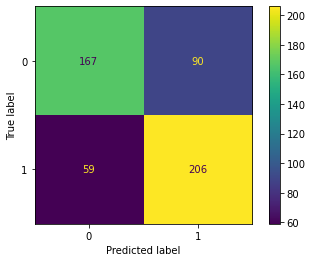

In [363]:
#plot confusion matrix
plot_confusion_matrix(gs, cv_test, y_test)

In [434]:
# Calculate model accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7145593869731801

|**Baseline Accuracy**| **Model Accuracy**|
|-------------------|---------------|
|     **0.507**   |      **0.714**|

**Based on the above scores,we can conclude that our model performs better than baseline model**

In [353]:
# mash up X and y test vals into one df
test_df = pd.concat([X_test, y_test], axis=1)

# add predictions to df
test_df['predictions'] = predictions

In [355]:
#rows where predictions were misclassified
test_df[test_df['subreddit_name'] != test_df['predictions']]

,post_title,subreddit_name,predictions
1750,ginastera vs ligeti term difficulti,0,1
360,adult beginn look onlin learn resourc,1,0
529,pandem mood shostakovich concerto 1 1st movement,1,0
644,beginn piec,1,0
452,mother day piec recommend,1,0
...,...,...,...
1745,simpl trick improv shift,0,1
117,time three free onlin event 6 8 21 6pm pacif,1,0
1749,develop bad habit practic without instructor,0,1
1099,know readi mayb recit,0,1


In [437]:
# calculate Misclassification
Error = 1-accuracy
Error

0.2854406130268199

**Misclassification Report**

- Accuracy score is 0.714 whereas Error Score is 0.285 
- 149 predictions were misclassified